2nd order linear PDE schemes, done in class Oct 8, 2019

In [13]:
import numpy
from matplotlib import pyplot as plt
import ipywidgets
%matplotlib inline

In [14]:
plt.rc('font', family='serif', size=16)

In [15]:
def rho_red_light(x, rho_max):
    rho = numpy.full_like(x, rho_max)
#     rho = rho_max * numpy.ones_like(x)
    mask = numpy.where(x < 3.0)
    rho[mask] /= 2
#     rho[mask] = rho_max/2
    return rho

In [16]:
# Set Parameters.
nx = 81
L = 4.0
dx = L / (nx-1)
x = numpy.linspace(0.0, L, num = nx)

rho_max = 10.0
u_max = 1.0

rho0 = rho_red_light(x, rho_max)

array([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10.])

In [21]:
def plot(n, x, rho_hist):
    plt.figure()
    plt.grid()
    plt.title('Time step: {}'.format(n))
    plt.xlabel('Road [km]')
    plt.ylabel('Traffic density [cars/hr]')
    plt.plot(x, rho_hist[n])
    plt.xlim(x[0], x[-1])
    plt.ylim(4.0, 11.0)
    plt.show()

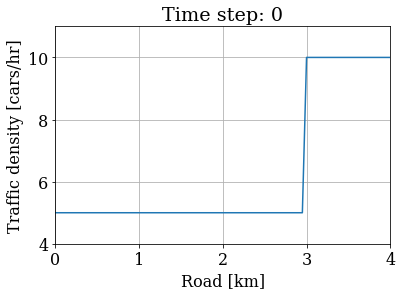

In [22]:
plot(0, x, [rho0])

In [23]:
def traffic_speed(rho, u_max, rho_max):
    return u_max * (1-rho/rho_max)

def traffic_flux(rho, u_max, rho_max):
    return rho * traffic_speed(rho, u_max, rho_max)


In [24]:
def interactive_plot(x, rho_hist):
    nt = len(rho_hist) - 1
    nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                     description='Time step')
    w = ipywidgets.interactive(plot, n=nt_slider,
                              x=ipywidgets.fixed(x),
                              rho_hist=ipywidgets.fixed(rho_hist))
    
    return w

In [29]:
interactive_plot(x, [rho0])

interactive(children=(IntSlider(value=0, description='Time step', max=0), Output()), _dom_classes=('widget-int…

In [57]:
def lax_freidrichs(rho0, nt, dt, dx, u_max, rho_max):
    rho_hist = [numpy.copy(rho0)]
    rho = rho0.copy()
    nx = len(rho0)
    for j in range(nt):
        rhon = rho.copy()
        F = traffic_flux(rhon, u_max, rho_max)
        for i in range(1, nx-1):
            rho[i] = 0.5*(rhon[i-1] + rho[i+1]) - (dt/(2*dx)) * (F[i+1] - F[i-1])
#         rho[1:-1] = 0.5 * (rhon[:-2] + rhon[2:]) - dt * (F[2:] - F[:-2] / dx)
        rho_hist.append(rho.copy())
        
    return rho_hist # List of numpy arrays

In [61]:
sigma = 1.0
dt = sigma * dx/u_max
nt = 40
rho_hist = lax_freidrichs(rho0, nt, dt, dx, u_max, rho_max)

interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='Time step', max=40), Output()), _dom_classes=('widget-in…

In [88]:
sigma = 1/16
dt = sigma * dx / u_max
nt = 40*16
#Diffusive error, smooths the curve
rho_hist = lax_freidrichs(rho0, nt, dt, dx, u_max, rho_max)

interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='Time step', max=640), Output()), _dom_classes=('widget-i…

In [89]:
def traffic_jacobian(rho0, u_max, rho_max):
    J = u_max * (1.0 - 2.0 * rho0/rho_max)
    return J

def lax_wendroff(rho0, nt, dt, dx, u_max, rho_max):
    rho_hist = [numpy.copy(rho0)]
    rho = rho0.copy()
    for i in range(nt):
        rhon = rho.copy()
        F = traffic_flux(rhon, u_max, rho_max)
        J = traffic_jacobian(rhon, u_max, rho_max)
        rho[1:-1] = (rho[1:-1] - (dt/(2*dx)) * (F[2:] - F[:-2]) +
                     (dt**2/(4*dx**2)) * ((J[1:-1] + J[2:]) *
                                          (F[2:] - F[1:-1]) -
                                          (J[:-2] + J[1:-1]) *
                                          (F[1:-1] - F[:-2])))
        rho_hist.append(rho.copy())
    return rho_hist

In [90]:
rho_hist2 = lax_wendroff(rho0, nt, dt, dx, u_max, rho_max)
#Dispersive error, leaves oscillation in the numerical solution.
interactive_plot(x, rho_hist2)

interactive(children=(IntSlider(value=0, description='Time step', max=640), Output()), _dom_classes=('widget-i…